Data Context: 
The dataset I have has a lot of information with 22 columns and a whopping around 8 million rows, 
making it quite large (about 1.78GB in size). It covers reported crimes in Chicago from 2001 to 
present, excluding murders. The data comes from the Chicago Police Department's CLEAR 
(Citizen Law Enforcement Analysis and Reporting) system. To protect victims' privacy, addresses 
are only given at the block level, keeping specific locations confidential. 

One crucial column in the dataset is the IUCR (Illinois Uniform Crime Reporting) Codes. These 
are four-digit codes used by law enforcement to categorize criminal incidents. In Illinois, the State 
Police establish these codes, but individual agencies can add more based on their needs. The 
Chicago Police Department uses over 400 IUCR codes, split into "Index" (common crimes 
reported nationally) and "Non-Index" offenses (other types of incidents). 

The Index offenses, like murder, robbery, and burglary, are part of the Federal Bureau of 
Investigation's Uniform Crime Reports, tracking crime trends nationwide. Non-Index offenses 
cover various incidents like vandalism and weapons violations. The dataset is extensive, below is 
the source link for the dataset. 

https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/about_data

    
Unit of Analysis: Crimes, Community, Area, Latitude, Longitude 

Variables/measures I plan to use throughout analysis: 

 Date - Date on which crime occured. 

 Primary Type - Primary type of crime. 

 IUCR – Four-digit Illinois Uniform Crime Reporting (IUCR) codes

 Description - Short description of the type of crime 

 Location description - Description of where crime occured 

 District - District code where crime occured 

 Community - Community area code where crime occured 

 Longitude & Latitude - Exact coordinates of crime occurance 

 FBI Code - numeric code indicating FBI crime categorization 

 Year - Year of crime 

 Arrest - Indicates whether arrest was made or not

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
chunk_size = 100000
chunks = pd.read_csv("Crimes_2001_to_Present_2024.csv", chunksize=chunk_size, low_memory=False)

# Initializing an empty list to store DataFrames
chunk_list = []

# Iterating through the chunks and storing them in the list
for i, chunk in enumerate(chunks):
    chunk_list.append(chunk)
    if i == 0:
        break  # Break after the first chunk

# Concatenating the list of DataFrames into a single DataFrame
data = pd.concat(chunk_list, ignore_index=True)

# Displaying the first few rows of the concatenated DataFrame
print(data.head())

         ID Case Number                    Date                  Block  IUCR  \
0  10365175    HZ100633  01/01/2016 01:30:00 PM        031XX W 63RD ST  0860   
1  10365292    HZ100781  01/01/2016 01:30:00 PM  011XX S FRANCISCO AVE  0810   
2  10376695    HZ100638  01/01/2016 01:30:00 PM   031XX W ROOSEVELT RD  0497   
3  10365249    HZ100661  01/01/2016 01:30:00 PM     082XX S DREXEL AVE  0460   
4  10366587    HZ102697  01/01/2016 01:30:00 PM  064XX S WASHTENAW AVE  0560   

  Primary Type                                     Description  \
0        THEFT                                    RETAIL THEFT   
1        THEFT                                       OVER $500   
2      BATTERY  AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON   
3      BATTERY                                          SIMPLE   
4      ASSAULT                                          SIMPLE   

  Location Description  Arrest  Domestic  ...                       Location  \
0   SMALL RETAIL STORE   False     False  

In [164]:
output_file = "Chicago_Crimes_Filtered_Data.csv"
data.to_csv(output_file, index=False)

In [165]:
data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
0,10365175,HZ100633,01/01/2016 01:30:00 PM,031XX W 63RD ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,"(41.778996043, -87.701473317)",44.0,21867.0,64.0,319.0,2.0,58.0,13.0,276.0,15.0
1,10365292,HZ100781,01/01/2016 01:30:00 PM,011XX S FRANCISCO AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,"(41.867608045, -87.698376638)",11.0,21184.0,30.0,35.0,23.0,28.0,16.0,146.0,28.0
2,10376695,HZ100638,01/01/2016 01:30:00 PM,031XX W ROOSEVELT RD,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,False,True,...,"(41.866428839, -87.703509785)",36.0,21569.0,30.0,35.0,14.0,28.0,16.0,140.0,24.0
3,10365249,HZ100661,01/01/2016 01:30:00 PM,082XX S DREXEL AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,"(41.744997768, -87.602582699)",9.0,21546.0,40.0,141.0,35.0,61.0,20.0,235.0,10.0
4,10366587,HZ102697,01/01/2016 01:30:00 PM,064XX S WASHTENAW AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,"(41.77640708, -87.690885165)",44.0,21867.0,64.0,319.0,31.0,58.0,13.0,274.0,16.0


In [166]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          100000 non-null  int64  
 1   Case Number                 100000 non-null  object 
 2   Date                        100000 non-null  object 
 3   Block                       100000 non-null  object 
 4   IUCR                        100000 non-null  object 
 5   Primary Type                100000 non-null  object 
 6   Description                 100000 non-null  object 
 7   Location Description        99496 non-null   object 
 8   Arrest                      100000 non-null  bool   
 9   Domestic                    100000 non-null  bool   
 10  Beat                        100000 non-null  int64  
 11  District                    100000 non-null  int64  
 12  Ward                        100000 non-null  int64  
 13  Community Area 

In [167]:
# Getting the number of rows and columns
num_rows = data.shape[0]
num_cols = data.shape[1]

# Printing the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 100000
Number of columns: 31


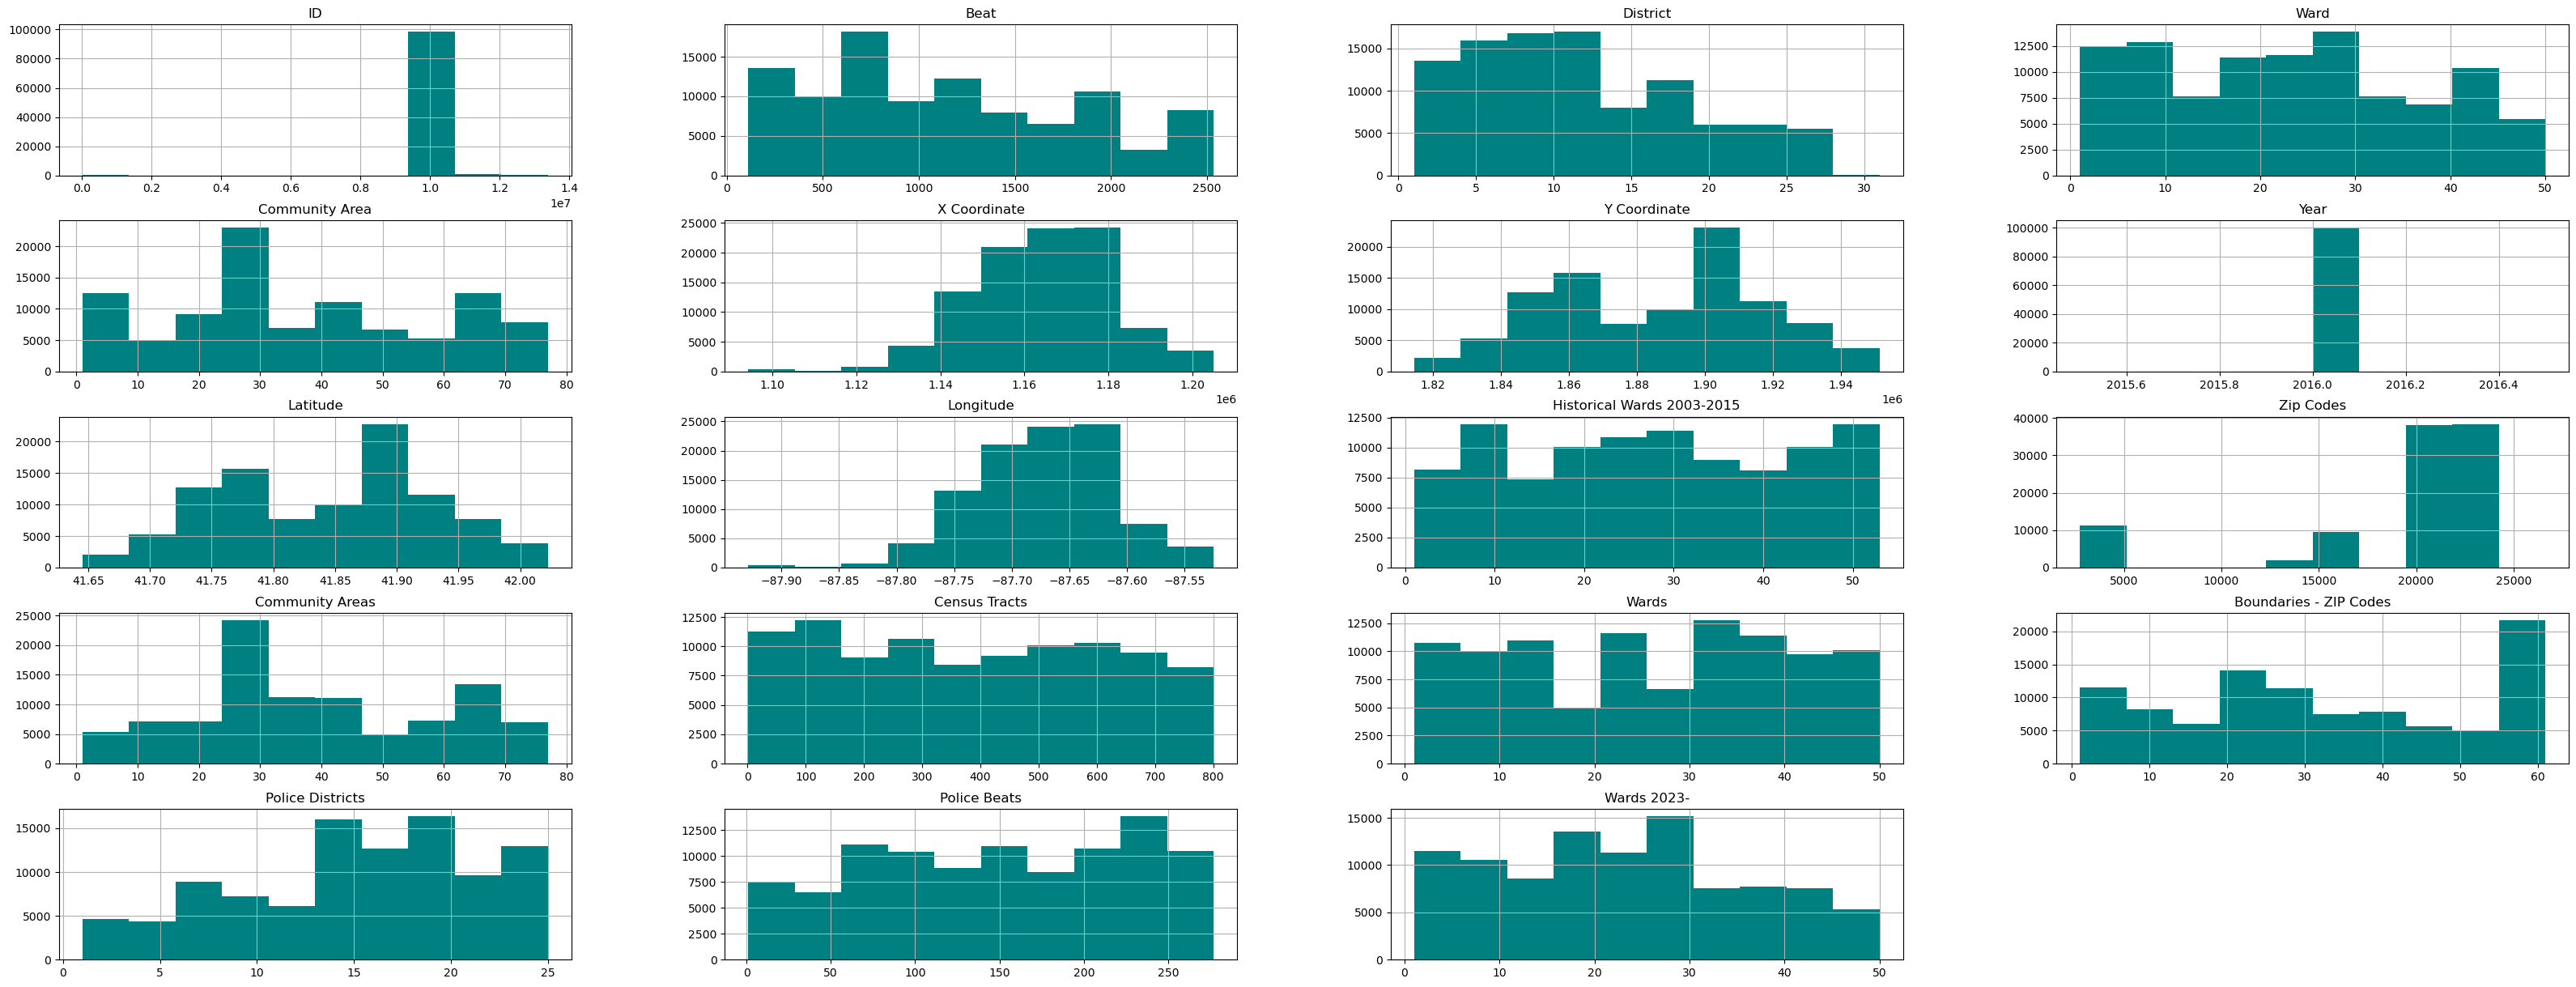

In [168]:
import matplotlib.pyplot as plt

# Create a larger figure
fig, ax = plt.subplots(figsize=(40, 15))

# Plot histogram
data.hist(ax=ax, color='teal')

# Show the plot
plt.show()


In [169]:
data.describe()


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,9.916000e+04,9.916000e+04,100000.0,99160.000000,99160.000000,98829.000000,99160.000000,98872.000000,98923.000000,98877.000000,98872.000000,98898.000000,98901.000000,98861.000000
mean,1.044046e+07,1148.088330,11.254070,23.041490,37.14251,1.164298e+06,1.886234e+06,2016.0,41.843430,-87.672597,27.480021,19073.528217,38.874343,381.430183,25.688391,32.006635,15.030395,148.945107,23.041290
std,5.280564e+05,689.577455,6.890158,13.847296,21.40589,1.637342e+04,3.111656e+04,0.0,0.085579,0.059605,15.071927,5712.260973,19.714954,233.120783,14.500199,19.012030,6.401462,77.977426,13.185886
min,2.224700e+04,111.000000,1.000000,1.000000,1.00000,1.094231e+06,1.814333e+06,2016.0,41.645288,-87.928909,1.000000,2733.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.041154e+07,613.000000,6.000000,10.000000,23.00000,1.152368e+06,1.859257e+06,2016.0,41.769085,-87.716073,15.000000,21184.000000,25.000000,172.000000,13.000000,16.000000,10.000000,82.000000,11.000000
50%,1.045521e+07,1031.000000,10.000000,24.000000,32.00000,1.165987e+06,1.893159e+06,2016.0,41.862502,-87.666136,27.000000,21560.000000,37.000000,378.000000,26.000000,30.000000,16.000000,150.000000,23.000000
75%,1.049828e+07,1711.000000,17.000000,34.000000,56.00000,1.176324e+06,1.908648e+06,2016.0,41.904992,-87.628540,41.000000,22216.000000,57.000000,580.000000,37.000000,52.000000,20.000000,221.000000,33.000000
max,1.338316e+07,2535.000000,31.000000,50.000000,77.00000,1.205114e+06,1.951495e+06,2016.0,42.022537,-87.524616,53.000000,26633.000000,77.000000,801.000000,50.000000,61.000000,25.000000,277.000000,50.000000


In [170]:
# Extracting unique values from the "Ward" column using set comprehension
unique_ward_values = {ward for ward in data["Ward"]}

# Printing the unique values
print("Unique values in the 'Ward' column:", unique_ward_values)


Unique values in the 'Ward' column: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}


In [171]:
# Replacing NaN values in the "Ward" column with 0 using fillna() method
ward_column = "Ward"  # New variable name for the column
data[ward_column].fillna(0, inplace=True)


In [172]:
# Converting the "Ward" column to integer type using pd.to_numeric()
ward_column = "Ward"
data[ward_column] = pd.to_numeric(data[ward_column], errors='coerce').fillna(0).astype(int)


In [173]:
# Extracting unique values from the "Ward" column using set()
unique_ward_values = set(data["Ward"])

# Printing the unique values
print("Unique values in the 'Ward' column:", unique_ward_values)


Unique values in the 'Ward' column: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50}


In [174]:
# Extracting unique values from the "Community Area" column using pd.unique()
unique_community_area_values = pd.unique(data["Community Area"])

# Printing the unique values
print("Unique values in the 'Community Area' column:", unique_community_area_values)


Unique values in the 'Community Area' column: [66 29 44 28 40 71 21 30 65 42 17 57 69 50 25  8 68 73 77  7 49 26 61 46
 32 31 67 23 52 43 74 12 58 35 27 15 75 38  3 63 22 11 70 19 41 53  6 39
  2 56 45 34 72 14 36 24 37 20 51  1 48 76 13 33 55 47 60 10 54  9 64 62
  5 59  4 16 18]


In [175]:
# Replacing NaN values with 0 and converting to integer type in one line
community_area_column = "Community Area"
data[community_area_column] = data[community_area_column].fillna(0).astype(int)


In [176]:
# Extracting unique values from the "Community Area" column using set()
unique_community_area_values = set(data["Community Area"])

# Printing the unique values
print("Unique values in the 'Community Area' column:", unique_community_area_values)


Unique values in the 'Community Area' column: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77}


In [177]:
# Extracting unique values from the "X Coordinate" column using pd.unique()
unique_x_coordinate_values = pd.unique(data["X Coordinate"])

# Printing the unique values
print("Unique values in the 'X Coordinate' column:", unique_x_coordinate_values)


Unique values in the 'X Coordinate' column: [1156591. 1157197. 1155802. ... 1139394. 1127971. 1178925.]


In [178]:
# Calculate the number of missing values per column
missing_values_per_column = data.apply(lambda x: x.isnull().sum())

# Print the number of missing values per column
print("Missing values per column:")
print(missing_values_per_column)


Missing values per column:
ID                               0
Case Number                      0
Date                             0
Block                            0
IUCR                             0
Primary Type                     0
Description                      0
Location Description           504
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             0
Community Area                   0
FBI Code                         0
X Coordinate                   840
Y Coordinate                   840
Year                             0
Updated On                       0
Latitude                       840
Longitude                      840
Location                       840
Historical Wards 2003-2015    1171
Zip Codes                      840
Community Areas               1128
Census Tracts                 1077
Wards                         1123
Boundaries - ZIP Codes      

In [179]:
# Calculating the frequency of missing values in each column
missing_values_frequency = data.isna().mean() * 100

# Printing the frequency of missing values
print("Frequency of missing values in each column:")
print(missing_values_frequency)


Frequency of missing values in each column:
ID                            0.000
Case Number                   0.000
Date                          0.000
Block                         0.000
IUCR                          0.000
Primary Type                  0.000
Description                   0.000
Location Description          0.504
Arrest                        0.000
Domestic                      0.000
Beat                          0.000
District                      0.000
Ward                          0.000
Community Area                0.000
FBI Code                      0.000
X Coordinate                  0.840
Y Coordinate                  0.840
Year                          0.000
Updated On                    0.000
Latitude                      0.840
Longitude                     0.840
Location                      0.840
Historical Wards 2003-2015    1.171
Zip Codes                     0.840
Community Areas               1.128
Census Tracts                 1.077
Wards               

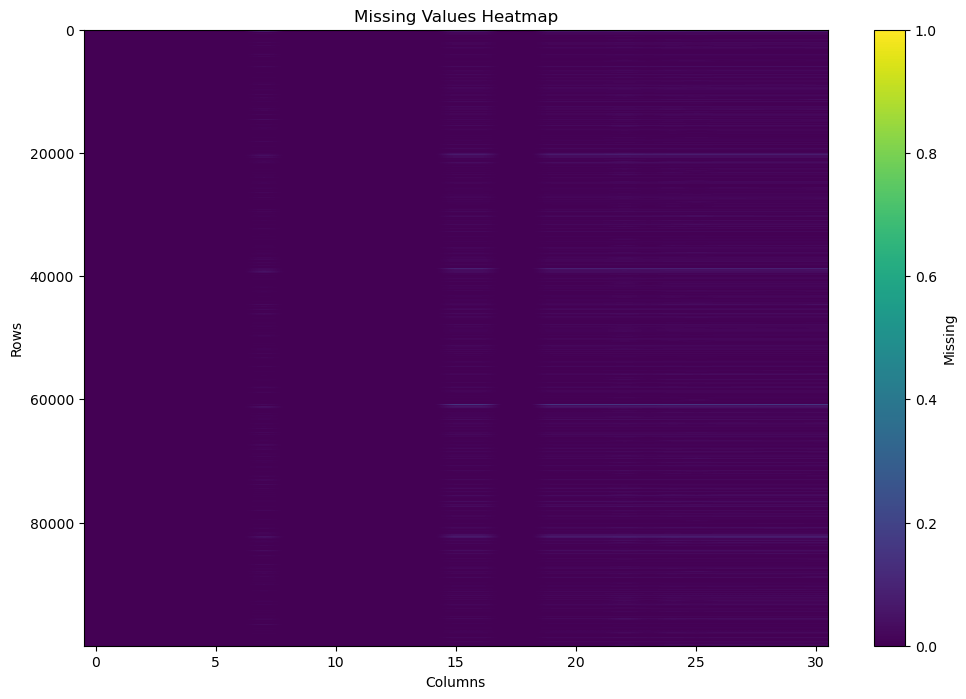

In [180]:
import matplotlib.pyplot as plt

# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
plt.imshow(data.isnull(), cmap='viridis', aspect='auto')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Missing Values Heatmap')
plt.colorbar(label='Missing')
plt.show()


In [181]:
# List of columns to fill missing values with 0.0
columns_to_fill = ["X Coordinate", "Y Coordinate", "Latitude", "Longitude", "Location"]

# Fill missing values in specific columns with 0.0 using a loop
for column in columns_to_fill:
    data[column] = data[column].fillna(value=0.0)


In [182]:
data.isnull().sum()


ID                               0
Case Number                      0
Date                             0
Block                            0
IUCR                             0
Primary Type                     0
Description                      0
Location Description           504
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             0
Community Area                   0
FBI Code                         0
X Coordinate                     0
Y Coordinate                     0
Year                             0
Updated On                       0
Latitude                         0
Longitude                        0
Location                         0
Historical Wards 2003-2015    1171
Zip Codes                      840
Community Areas               1128
Census Tracts                 1077
Wards                         1123
Boundaries - ZIP Codes        1128
Police Districts    

In [183]:
data.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-'],
      dtype='object')

In [184]:
data.isnull().sum()


ID                               0
Case Number                      0
Date                             0
Block                            0
IUCR                             0
Primary Type                     0
Description                      0
Location Description           504
Arrest                           0
Domestic                         0
Beat                             0
District                         0
Ward                             0
Community Area                   0
FBI Code                         0
X Coordinate                     0
Y Coordinate                     0
Year                             0
Updated On                       0
Latitude                         0
Longitude                        0
Location                         0
Historical Wards 2003-2015    1171
Zip Codes                      840
Community Areas               1128
Census Tracts                 1077
Wards                         1123
Boundaries - ZIP Codes        1128
Police Districts    

In [185]:
data.dtypes


ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                        int64
Ward                            int32
Community Area                  int32
FBI Code                       object
X Coordinate                  float64
Y Coordinate                  float64
Year                            int64
Updated On                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards       

In [186]:
# Extracting unique values from the "X Coordinate" column using set()
unique_x_coordinate_values = set(data["X Coordinate"])

# Printing the unique values
print("Unique values in the 'X Coordinate' column:", unique_x_coordinate_values)


Unique values in the 'X Coordinate' column: {0.0, 1179648.0, 1179650.0, 1179651.0, 1179652.0, 1179653.0, 1179654.0, 1179656.0, 1179657.0, 1179658.0, 1179659.0, 1179660.0, 1179661.0, 1179662.0, 1179664.0, 1179665.0, 1179668.0, 1179671.0, 1179674.0, 1179676.0, 1179677.0, 1179678.0, 1179679.0, 1179680.0, 1179683.0, 1179684.0, 1179686.0, 1179687.0, 1179694.0, 1179695.0, 1179696.0, 1179697.0, 1179698.0, 1179701.0, 1179704.0, 1179706.0, 1179707.0, 1179713.0, 1179714.0, 1179715.0, 1179716.0, 1179719.0, 1179720.0, 1179721.0, 1179723.0, 1179726.0, 1179728.0, 1179729.0, 1179731.0, 1179732.0, 1179736.0, 1179739.0, 1179740.0, 1179741.0, 1179746.0, 1179750.0, 1179751.0, 1179752.0, 1179753.0, 1179755.0, 1179757.0, 1179758.0, 1179759.0, 1179760.0, 1179762.0, 1179763.0, 1179764.0, 1179765.0, 1179766.0, 1179768.0, 1179773.0, 1179775.0, 1179777.0, 1179778.0, 1179780.0, 1179781.0, 1179782.0, 1179783.0, 1179784.0, 1179789.0, 1179790.0, 1179791.0, 1179792.0, 1179793.0, 1179794.0, 1179795.0, 1179796.0, 1179

In [187]:
# Converting the "X Coordinate" column to integer type using pd.to_numeric()
x_coordinate_column = "X Coordinate"
data[x_coordinate_column] = pd.to_numeric(data[x_coordinate_column], errors='coerce').fillna(0).astype(int)


In [188]:


# Extracting unique values from the "X Coordinate" column using numpy.unique()
unique_x_coordinate_values = np.unique(data["X Coordinate"])

# Printing the unique values
print("Unique values in the 'X Coordinate' column:", unique_x_coordinate_values)


Unique values in the 'X Coordinate' column: [      0 1094231 1094470 ... 1204793 1205106 1205114]


In [189]:
# Extracting unique values from the "Y Coordinate" column using set()
unique_y_coordinate_values = set(data["Y Coordinate"])

# Printing the unique values
print("Unique values in the 'Y Coordinate' column:", unique_y_coordinate_values)


Unique values in the 'Y Coordinate' column: {0.0, 1835008.0, 1835010.0, 1835011.0, 1835009.0, 1835015.0, 1835016.0, 1835023.0, 1835024.0, 1835025.0, 1835028.0, 1835032.0, 1835033.0, 1835034.0, 1835039.0, 1835043.0, 1835045.0, 1835051.0, 1835052.0, 1835055.0, 1835057.0, 1835059.0, 1835060.0, 1835061.0, 1835067.0, 1835069.0, 1835071.0, 1835078.0, 1835080.0, 1835082.0, 1835083.0, 1835084.0, 1835097.0, 1835102.0, 1835106.0, 1835107.0, 1835112.0, 1835113.0, 1835114.0, 1835115.0, 1835116.0, 1835118.0, 1835119.0, 1835123.0, 1835124.0, 1835128.0, 1835137.0, 1835143.0, 1835147.0, 1835148.0, 1835151.0, 1835154.0, 1835157.0, 1835158.0, 1835159.0, 1835160.0, 1835163.0, 1835165.0, 1835166.0, 1835173.0, 1835176.0, 1835179.0, 1835180.0, 1835181.0, 1835182.0, 1835185.0, 1835189.0, 1835199.0, 1835204.0, 1835205.0, 1835209.0, 1835211.0, 1835215.0, 1835216.0, 1835217.0, 1835218.0, 1835220.0, 1835222.0, 1835223.0, 1835224.0, 1835228.0, 1835230.0, 1835232.0, 1835237.0, 1835241.0, 1835243.0, 1835245.0, 1835

In [190]:
# Converting the "Y Coordinate" column to integer type using pd.to_numeric()
y_coordinate_column = "Y Coordinate"
data[y_coordinate_column] = pd.to_numeric(data[y_coordinate_column], errors='coerce').fillna(0).astype(int)


In [191]:


# Extracting unique values from the "X Coordinate" column using numpy.unique()
unique_x_coordinate_values = np.unique(data["X Coordinate"])

# Printing the unique values
print("Unique values in the 'X Coordinate' column:", unique_x_coordinate_values)


Unique values in the 'X Coordinate' column: [      0 1094231 1094470 ... 1204793 1205106 1205114]


In [192]:
data.dtypes


ID                              int64
Case Number                    object
Date                           object
Block                          object
IUCR                           object
Primary Type                   object
Description                    object
Location Description           object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                        int64
Ward                            int32
Community Area                  int32
FBI Code                       object
X Coordinate                    int32
Y Coordinate                    int32
Year                            int64
Updated On                     object
Latitude                      float64
Longitude                     float64
Location                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards       

In [193]:
# Converting the "Date" column to datetime format
date_column = "Date"  # New variable name for the column
data[date_column] = pd.to_datetime(data[date_column], format='%m/%d/%Y %I:%M:%S %p')

# Setting the index as a DatetimeIndex
data.index = pd.DatetimeIndex(data[date_column])

In [194]:
# Extracting day, month, and time from the 'Date' column
date_column = "Date"  
day_column = "Day"  
month_column = "Month"  
time_column = "Time"  

data[day_column] = pd.DatetimeIndex(data[date_column]).day
data[month_column] = pd.DatetimeIndex(data[date_column]).month
data[time_column] = pd.to_datetime(data[date_column]).dt.time

In [195]:
data.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-', 'Day', 'Month',
       'Time'],
      dtype='object')

In [196]:
data.dtypes


ID                                     int64
Case Number                           object
Date                          datetime64[ns]
Block                                 object
IUCR                                  object
Primary Type                          object
Description                           object
Location Description                  object
Arrest                                  bool
Domestic                                bool
Beat                                   int64
District                               int64
Ward                                   int32
Community Area                         int32
FBI Code                              object
X Coordinate                           int32
Y Coordinate                           int32
Year                                   int64
Updated On                            object
Latitude                             float64
Longitude                            float64
Location                              object
Historical

In [197]:
data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 13:30:00,10365175,HZ100633,2016-01-01 13:30:00,031XX W 63RD ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,64.0,319.0,2.0,58.0,13.0,276.0,15.0,1,1,13:30:00
2016-01-01 13:30:00,10365292,HZ100781,2016-01-01 13:30:00,011XX S FRANCISCO AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,30.0,35.0,23.0,28.0,16.0,146.0,28.0,1,1,13:30:00
2016-01-01 13:30:00,10376695,HZ100638,2016-01-01 13:30:00,031XX W ROOSEVELT RD,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,False,True,...,30.0,35.0,14.0,28.0,16.0,140.0,24.0,1,1,13:30:00
2016-01-01 13:30:00,10365249,HZ100661,2016-01-01 13:30:00,082XX S DREXEL AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,40.0,141.0,35.0,61.0,20.0,235.0,10.0,1,1,13:30:00
2016-01-01 13:30:00,10366587,HZ102697,2016-01-01 13:30:00,064XX S WASHTENAW AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,64.0,319.0,31.0,58.0,13.0,274.0,16.0,1,1,13:30:00


array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Beat'}>,
        <Axes: title={'center': 'District'}>,
        <Axes: title={'center': 'Ward'}>],
       [<Axes: title={'center': 'Community Area'}>,
        <Axes: title={'center': 'X Coordinate'}>,
        <Axes: title={'center': 'Y Coordinate'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Historical Wards 2003-2015'}>,
        <Axes: title={'center': 'Zip Codes'}>,
        <Axes: title={'center': 'Community Areas'}>,
        <Axes: title={'center': 'Census Tracts'}>],
       [<Axes: title={'center': 'Wards'}>,
        <Axes: title={'center': 'Boundaries - ZIP Codes'}>,
        <Axes: title={'center': 'Police Districts'}>,
        <Axes: title={'center': 'Police Beats'}>,
        <Axes: title={'center': 'Wards 2023-'}>],
       [<Axes: title={'center': 'D

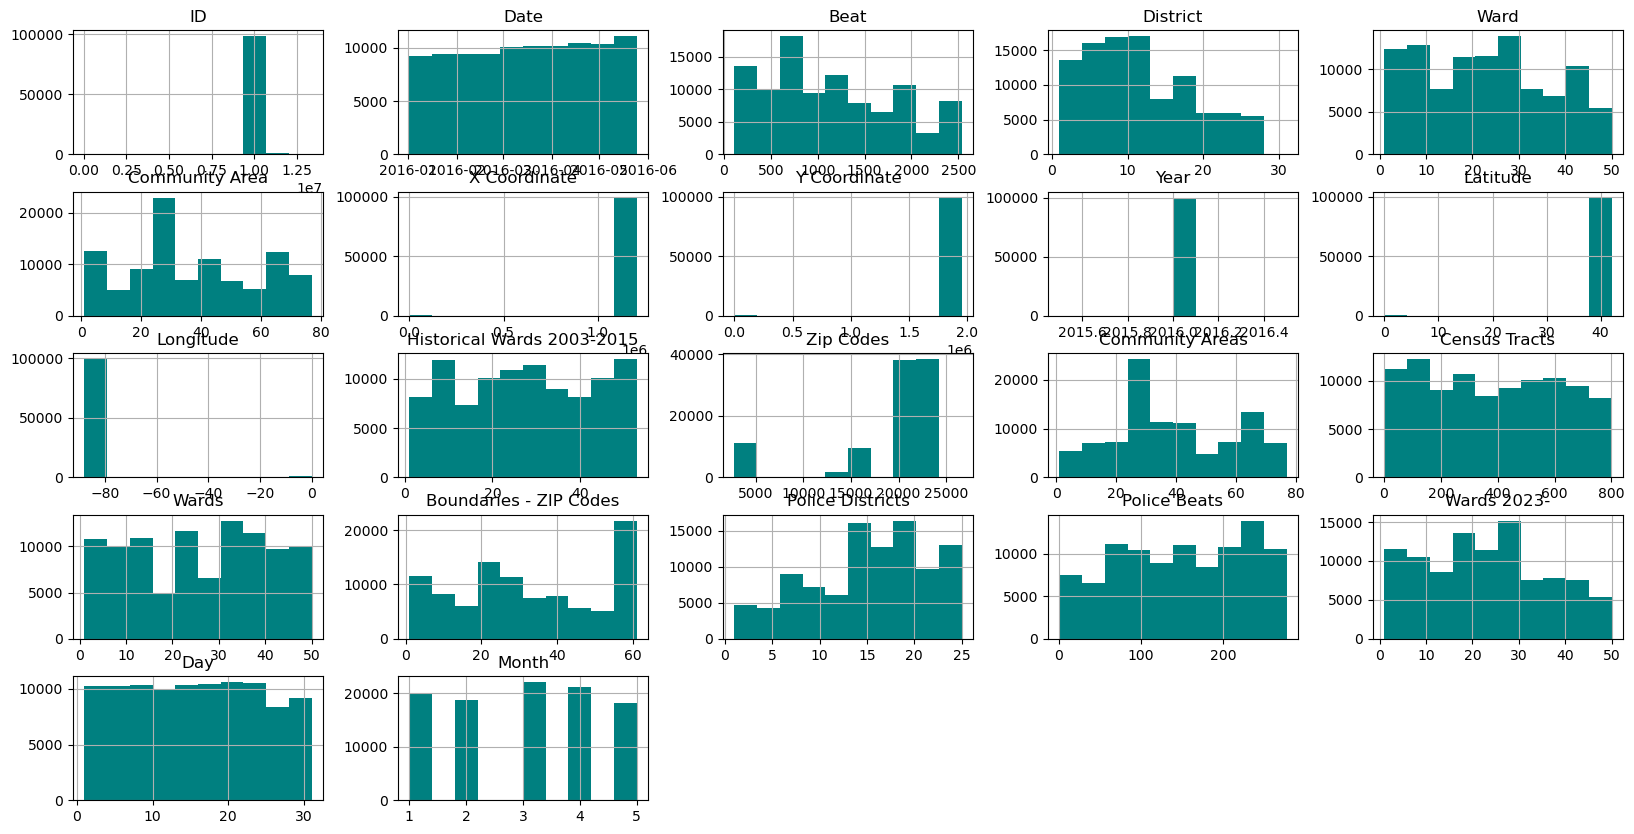

In [198]:
data.hist(color='teal',figsize=(20,10))


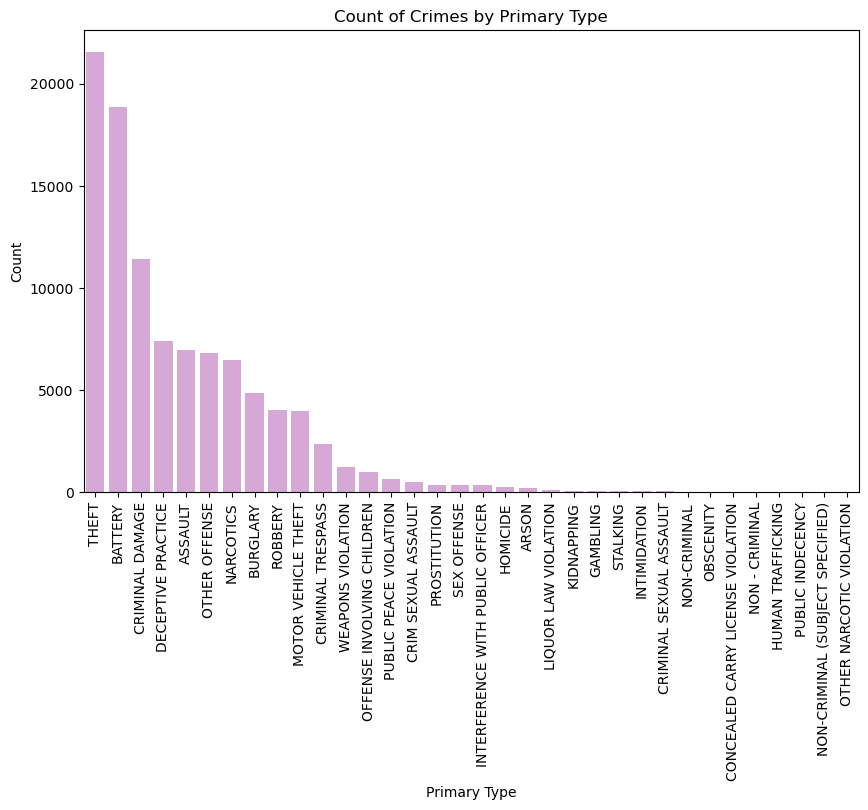

In [199]:
import seaborn as sns
primary_type_counts = data["Primary Type"].value_counts()

# Plotting a bar plot of the counts of each category in the "Primary Type" column
plt.figure(figsize=(10, 6))  
sns.barplot(x=primary_type_counts.index, y=primary_type_counts.values, color='plum')
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.title("Count of Crimes by Primary Type")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [200]:
# Getting the top 10 crime types
top_10_crimes = data['Primary Type'].value_counts().nlargest(10)

# Printing the top 10 crime types
print(top_10_crimes)


THEFT                  21548
BATTERY                18889
CRIMINAL DAMAGE        11411
DECEPTIVE PRACTICE      7397
ASSAULT                 6961
OTHER OFFENSE           6817
NARCOTICS               6460
BURGLARY                4882
ROBBERY                 4028
MOTOR VEHICLE THEFT     3959
Name: Primary Type, dtype: int64


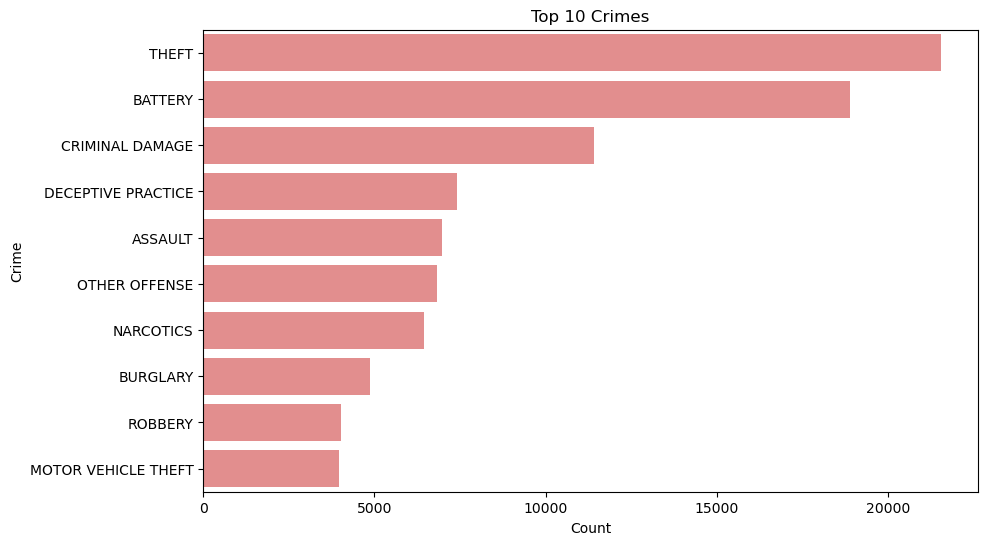

In [201]:
import seaborn as sns

# Extracting the top 10 crime types by count
top_10_crimes = data['Primary Type'].value_counts().nlargest(10)

# Plotting the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, color='lightcoral')
plt.xlabel("Count")
plt.ylabel("Crime")
plt.title("Top 10 Crimes")
plt.show()


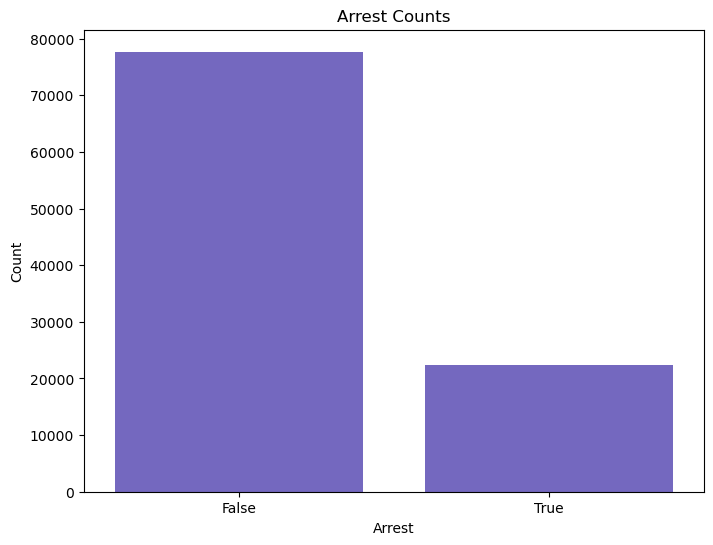

In [202]:
import seaborn as sns

# Plotting the count of arrests using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Arrest', data=data, color='slateblue')

# Setting plot labels
plt.xlabel("Arrest")
plt.ylabel("Count")
plt.title("Arrest Counts")

# Displaying the plot
plt.show()


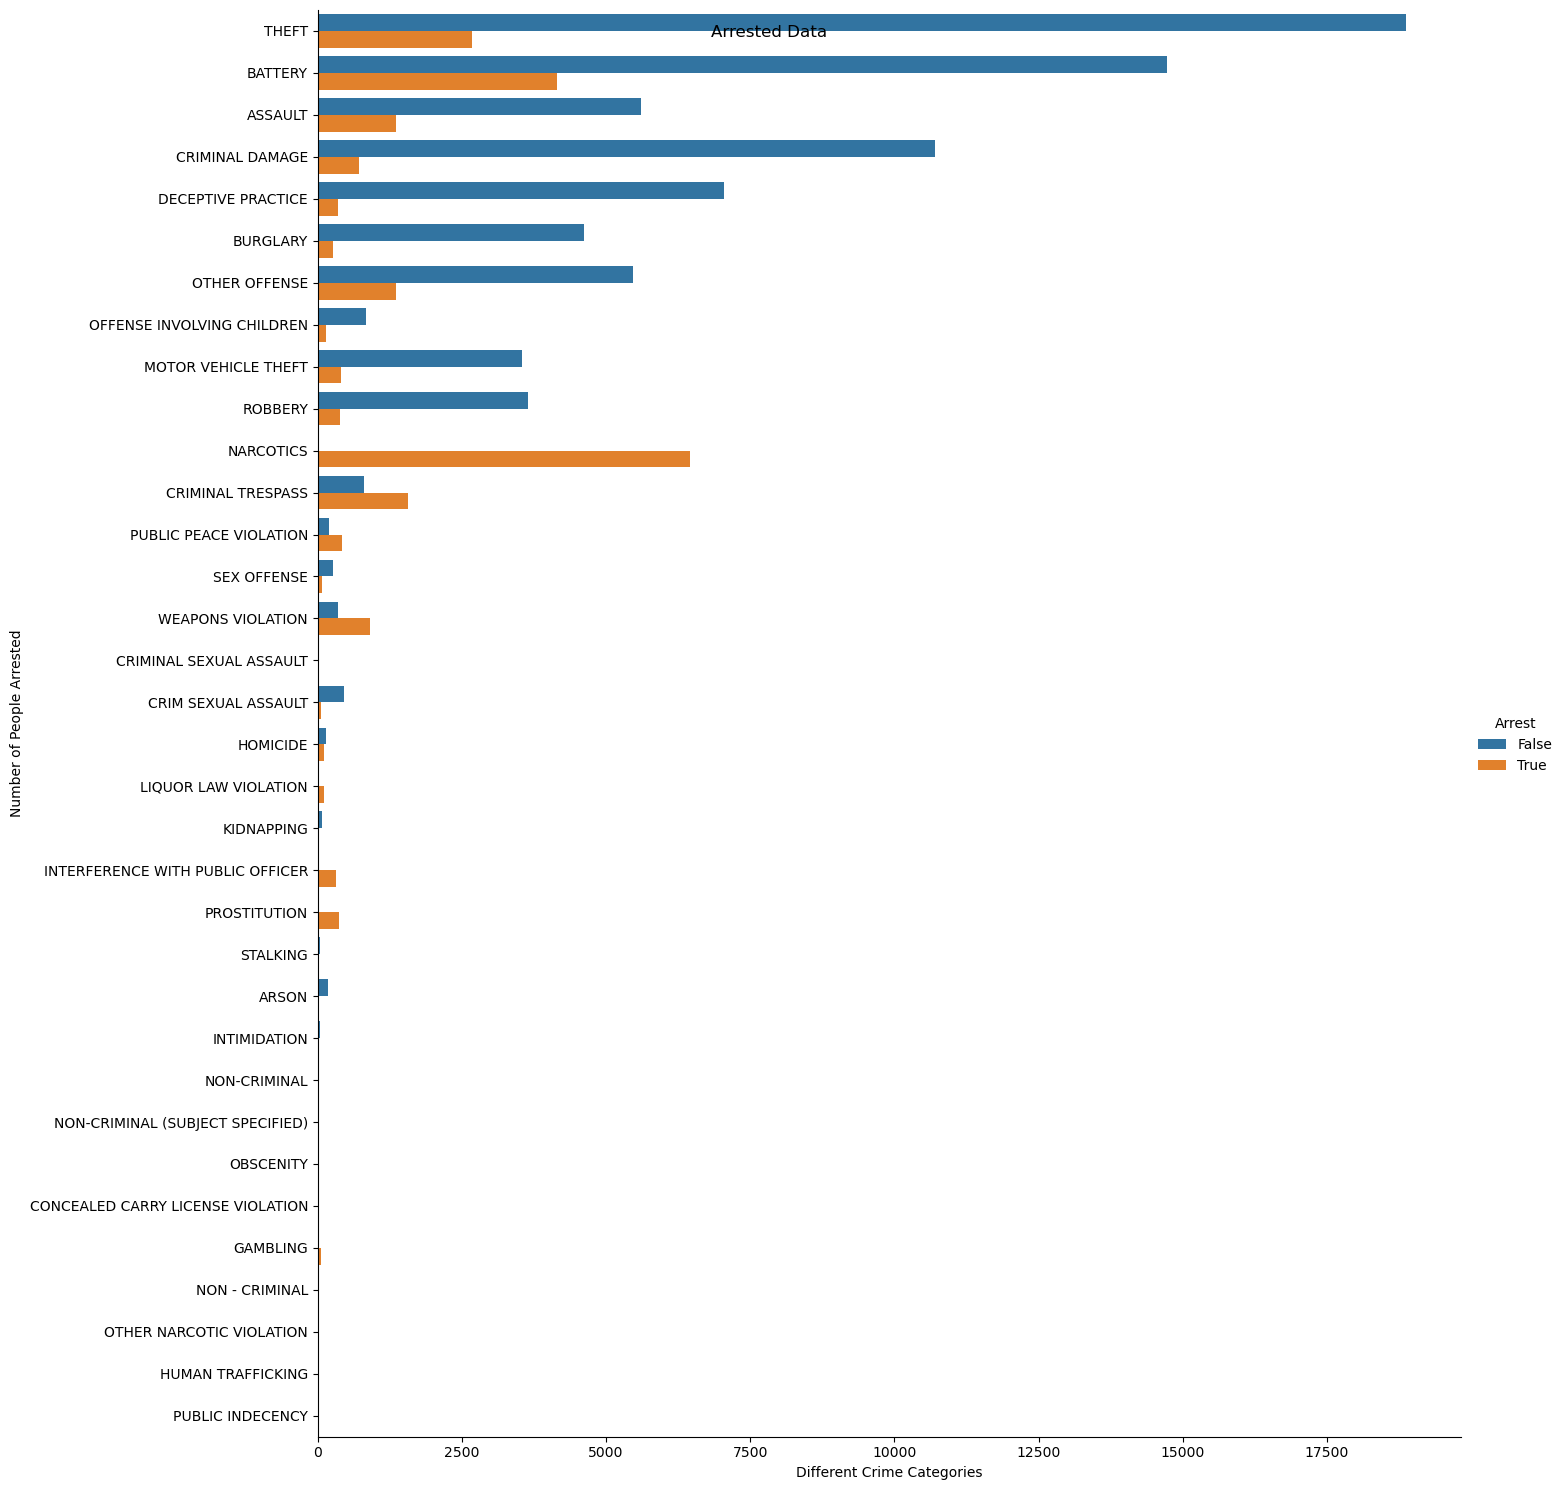

In [203]:
# Creating a catplot with different variable names
arrested_data = sns.catplot(y="Primary Type", hue="Arrest", kind="count", data=data, height=15)

# Setting axis labels
arrested_data.set_axis_labels("Different Crime Categories", "Number of People Arrested")

# Displaying the catplot
arrested_data.fig.suptitle("Arrested Data")
plt.show()

In [204]:
# Grouping the data by 'Arrest' and counting the occurrences
arrest_counts = data['Arrest'].value_counts().sort_values(ascending=False)

# Displaying the count of arrests
print(arrest_counts)


False    77688
True     22312
Name: Arrest, dtype: int64


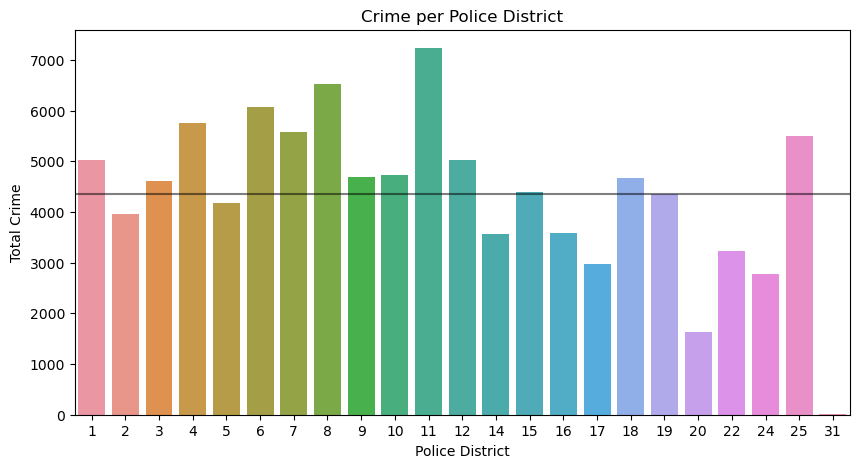

In [205]:
# Plotting crime counts per police district with modified variable names
plt.figure(figsize=(10, 5))
crime_count_per_district = data['District'].value_counts()
sns.barplot(x=crime_count_per_district.index, y=crime_count_per_district.values)
mean_crime_count = crime_count_per_district.mean()
plt.axhline(mean_crime_count, color='black', alpha=0.5)
plt.xlabel('Police District')
plt.ylabel('Total Crime')
plt.title('Crime per Police District')

plt.show()


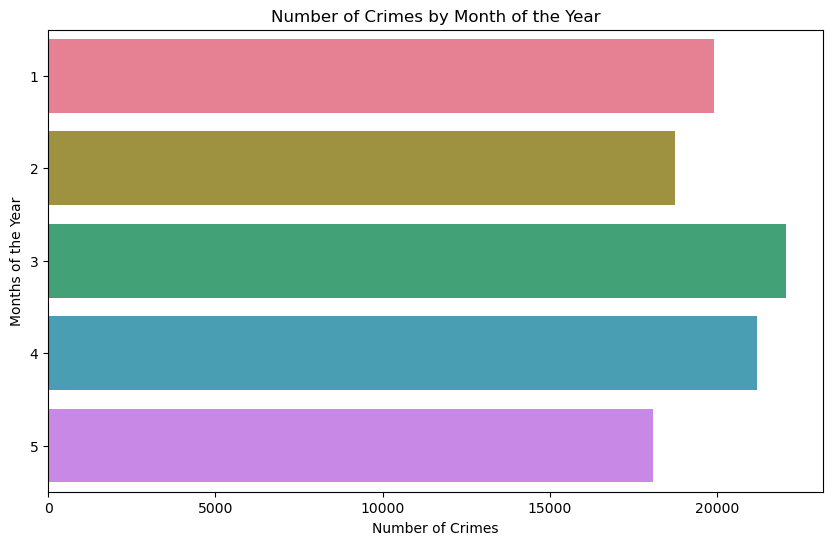

In [206]:

# Plotting the number of crimes by month of the year using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(y=data.index.month, palette='husl')
plt.xlabel('Number of Crimes')
plt.ylabel('Months of the Year')
plt.title('Number of Crimes by Month of the Year')
plt.show()


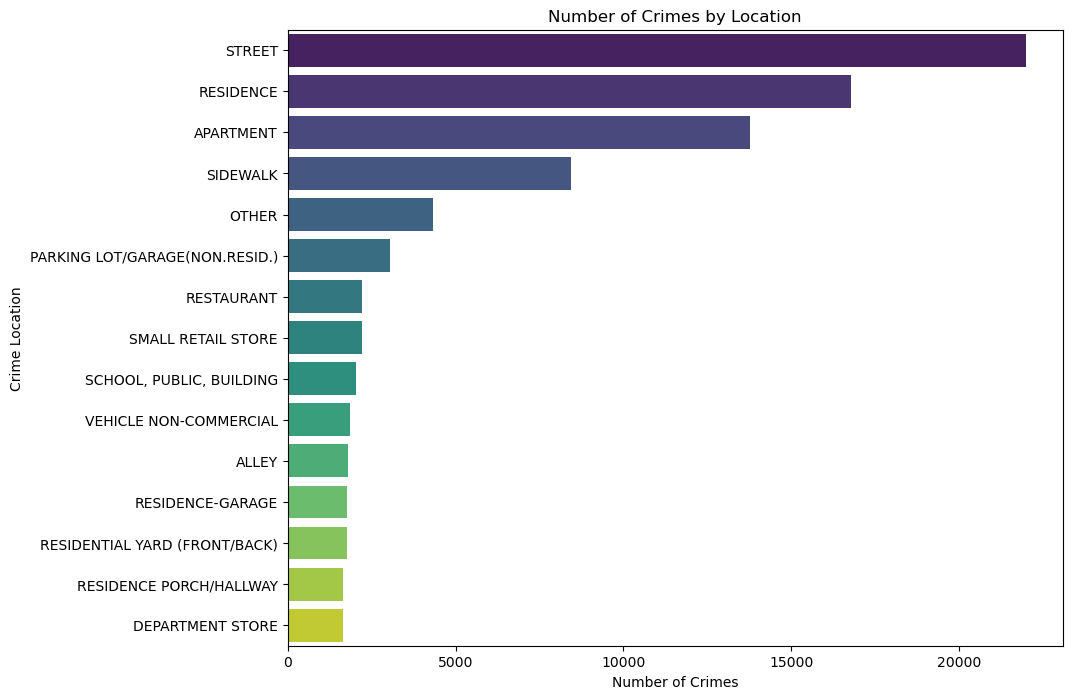

In [207]:

# Grouping the data by location description and counting the number of crimes
crime_count_by_location = data['Location Description'].value_counts().head(15)

# Plotting the count of crimes by location using seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x=crime_count_by_location.values, y=crime_count_by_location.index, palette='viridis')
plt.title('Number of Crimes by Location')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Location')
plt.show()


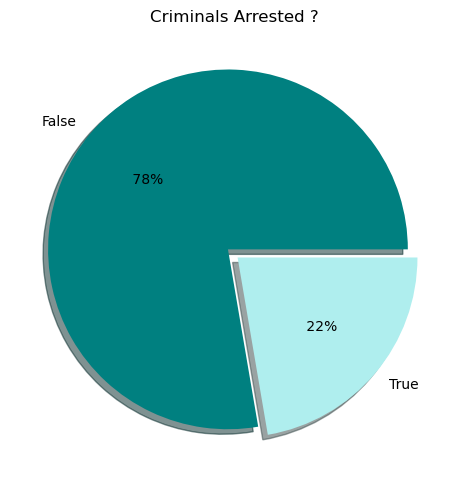

In [208]:
# Plotting the pie chart of arrest counts percentage
plt.figure(figsize=(5, 5))
plt.pie(arrest_counts, labels=arrest_counts.index, autopct="%3.0f%%", colors=['teal', 'paleturquoise'], shadow=True, explode=[0.05, 0.02], textprops={'fontsize': 10})
plt.title('Criminals Arrested ?', fontsize=12)
plt.tight_layout()
plt.show()


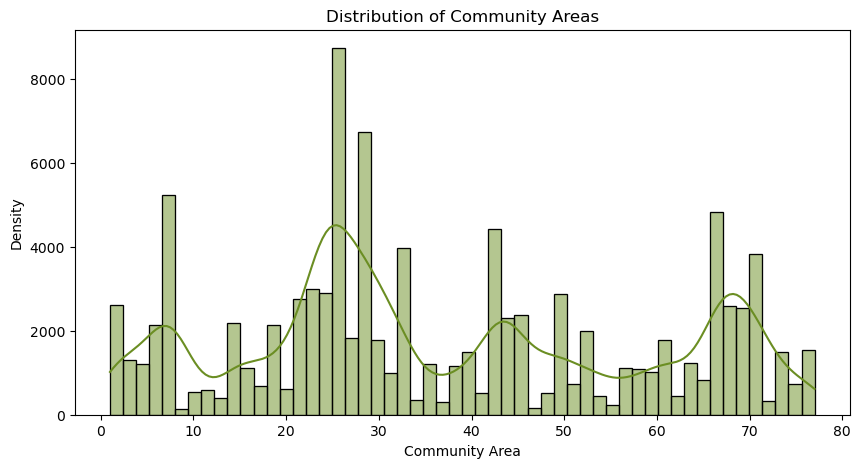

In [209]:
# Plotting the distribution of community areas with seaborn histplot
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Community Area", color='olivedrab', kde=True)
plt.title("Distribution of Community Areas")
plt.xlabel("Community Area")
plt.ylabel("Density")
plt.show()


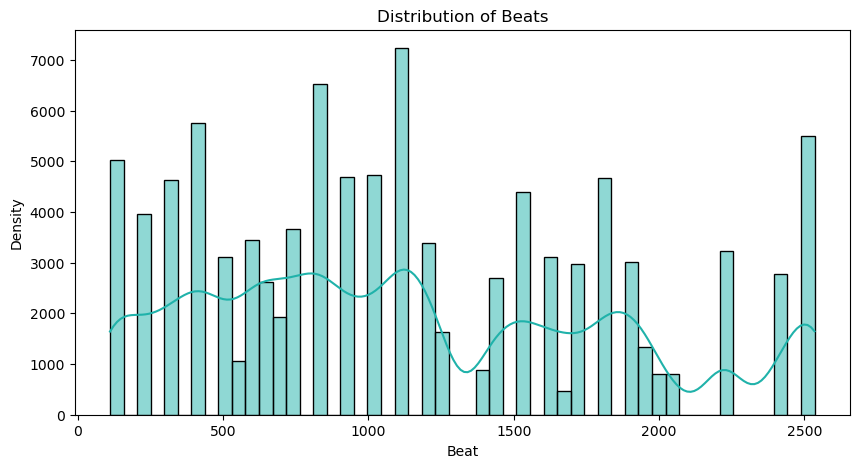

In [210]:
# Plotting the distribution of beats with seaborn histplot
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Beat", color='lightseagreen', kde=True)
plt.title("Distribution of Beats")
plt.xlabel("Beat")
plt.ylabel("Density")
plt.show()


In [211]:
data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-,Day,Month,Time
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01 13:30:00,10365175,HZ100633,2016-01-01 13:30:00,031XX W 63RD ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,64.0,319.0,2.0,58.0,13.0,276.0,15.0,1,1,13:30:00
2016-01-01 13:30:00,10365292,HZ100781,2016-01-01 13:30:00,011XX S FRANCISCO AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,30.0,35.0,23.0,28.0,16.0,146.0,28.0,1,1,13:30:00
2016-01-01 13:30:00,10376695,HZ100638,2016-01-01 13:30:00,031XX W ROOSEVELT RD,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,STREET,False,True,...,30.0,35.0,14.0,28.0,16.0,140.0,24.0,1,1,13:30:00
2016-01-01 13:30:00,10365249,HZ100661,2016-01-01 13:30:00,082XX S DREXEL AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,40.0,141.0,35.0,61.0,20.0,235.0,10.0,1,1,13:30:00
2016-01-01 13:30:00,10366587,HZ102697,2016-01-01 13:30:00,064XX S WASHTENAW AVE,0560,ASSAULT,SIMPLE,SIDEWALK,False,False,...,64.0,319.0,31.0,58.0,13.0,274.0,16.0,1,1,13:30:00


<Axes: >

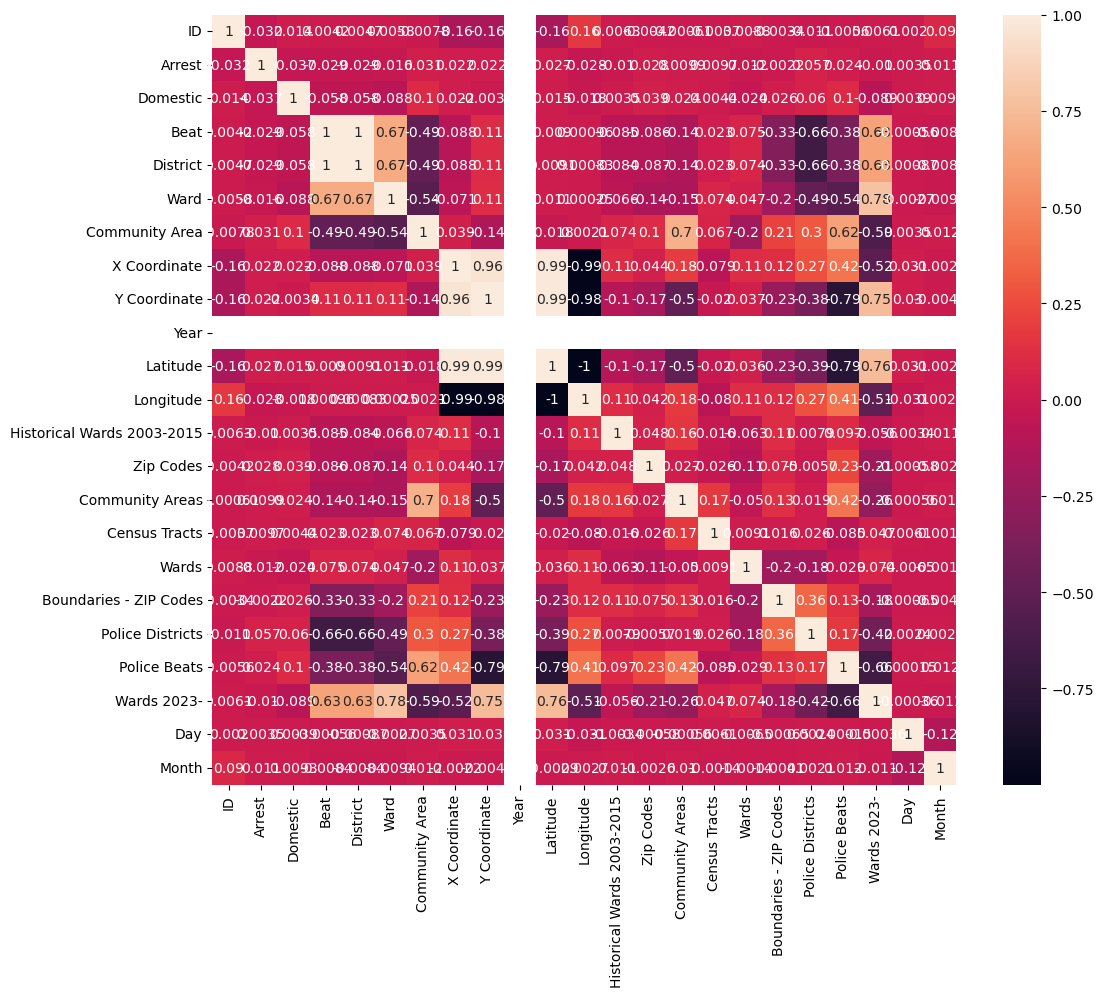

In [212]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [213]:
data.columns


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'Wards 2023-', 'Day', 'Month',
       'Time'],
      dtype='object')

In [214]:
chicago_crime = data.drop(['ID', 'Date', 'Block', 'Description', 'Beat', 'District',
                                        'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate',
                                        'Year', 'Updated On', 'Latitude', 'Longitude', 'Location',
                                        'Day', 'Month', 'Time', 'Location Description'],
                                       axis=1)

In [215]:
chicago_crime.columns


Index(['Case Number', 'IUCR', 'Primary Type', 'Arrest', 'Domestic', 'FBI Code',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts',
       'Police Beats', 'Wards 2023-'],
      dtype='object')

In [216]:
chicago_crime.dtypes


Case Number                    object
IUCR                           object
Primary Type                   object
Arrest                           bool
Domestic                         bool
FBI Code                       object
Historical Wards 2003-2015    float64
Zip Codes                     float64
Community Areas               float64
Census Tracts                 float64
Wards                         float64
Boundaries - ZIP Codes        float64
Police Districts              float64
Police Beats                  float64
Wards 2023-                   float64
dtype: object

In [217]:
chicago_crime.head()


,Case Number,IUCR,Primary Type,Arrest,Domestic,FBI Code,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Wards 2023-
Date,,,,,,,,,,,,,,,
2016-01-01 13:30:00,HZ100633,0860,THEFT,False,False,06,44.0,21867.0,64.0,319.0,2.0,58.0,13.0,276.0,15.0
2016-01-01 13:30:00,HZ100781,0810,THEFT,False,True,06,11.0,21184.0,30.0,35.0,23.0,28.0,16.0,146.0,28.0
2016-01-01 13:30:00,HZ100638,0497,BATTERY,False,True,04B,36.0,21569.0,30.0,35.0,14.0,28.0,16.0,140.0,24.0
2016-01-01 13:30:00,HZ100661,0460,BATTERY,False,False,08B,9.0,21546.0,40.0,141.0,35.0,61.0,20.0,235.0,10.0
2016-01-01 13:30:00,HZ102697,0560,ASSAULT,False,False,08A,44.0,21867.0,64.0,319.0,31.0,58.0,13.0,274.0,16.0


In [218]:
from sklearn.preprocessing import OneHotEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc,classification_report
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

In [219]:
from sklearn.model_selection import train_test_split

# Define features excluding the target variable 'Arrest'
features = [col for col in chicago_crime.columns if col != 'Arrest']

# Assigning features and target variable to X and y respectively
X = chicago_crime.loc[:, features]
y = chicago_crime['Arrest']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Printing the number of records in training and test data, and the features
print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')


Records in training data: 80,000
Records in test data: 20,000

Features:
Case Number
IUCR
Primary Type
Domestic
FBI Code
Historical Wards 2003-2015
Zip Codes
Community Areas
Census Tracts
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats
Wards 2023-


In [220]:
# Selecting categorical columns
cat_columns = X.select_dtypes(include='object').columns.tolist()

# Displaying the list of categorical columns
print(cat_columns)


['Case Number', 'IUCR', 'Primary Type', 'FBI Code']


In [221]:
# Define the categorical pipeline
cat_pipeline = Pipeline([
    ('impute_missing', SimpleImputer(strategy='most_frequent')),
    ('create_dummies', OneHotEncoder(handle_unknown='ignore'))
])

# Fit and transform the categorical features
cat_features_transformed = cat_pipeline.fit_transform(X_train[cat_columns])

# Displaying the shape of transformed categorical features
print(cat_features_transformed.shape)

(80000, 80341)


In [222]:
from sklearn.pipeline import Pipeline

# Define the processing pipeline
processing_pipeline = Pipeline([
    ('create_dummies', cat_pipeline)
])

# Fit and transform the processing pipeline
processed_pipeline = processing_pipeline.fit_transform(X_train[cat_columns])

# Displaying the shape of transformed data
print(processed_pipeline.shape)


(80000, 80341)


In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression pipeline with the LogisticRegression model directly
logistic_regression_pipeline = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('model', LogisticRegression(max_iter=1000))
])

# Define parameters for grid search
params = {
    'model__C': [0.1, 0.3, 0.5, 1.0, 5],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV object
logistic_regression_model = GridSearchCV(logistic_regression_pipeline, param_grid=params, cv=5, scoring='accuracy')

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Display the best parameters
print(logistic_regression_model.best_params_)


{'model__C': 0.5, 'model__penalty': 'l2', 'model__solver': 'liblinear'}


In [224]:
# Predicting on the test and train data using the best estimator from the logistic regression model
predicted_y_test = logistic_regression_model.predict(X_test)
predicted_y_train = logistic_regression_model.predict(X_train)

# Printing the predictions
print(predicted_y_test)
print(predicted_y_train)


[False False False ... False False  True]
[ True False False ... False False False]


In [225]:
# Predicting on the test data
predicted_y_test = logistic_regression_model.predict(X_test)

# Calculating the test score
test_score = accuracy_score(y_test, predicted_y_test)

# Printing the test score
print(f'Test Score: {test_score:.2%}')

Test Score: 88.89%


In [226]:

# Predicting on the train data
predicted_y_train = logistic_regression_model.predict(X_train)

# Calculating the train score
train_score = accuracy_score(y_train, predicted_y_train)

# Printing the train score
print(f'Train Score: {train_score:.2%}')


Train Score: 89.81%


In [227]:
conf_matrix = confusion_matrix(y_test, predicted_y_test)
print(conf_matrix)

[[15181   386]
 [ 1836  2597]]


In [228]:
report = classification_report(y_test, predicted_y_test)
print(report)

              precision    recall  f1-score   support

       False       0.89      0.98      0.93     15567
        True       0.87      0.59      0.70      4433

    accuracy                           0.89     20000
   macro avg       0.88      0.78      0.82     20000
weighted avg       0.89      0.89      0.88     20000



In [229]:
# Calculate and print accuracy score
accuracy = accuracy_score(y_test, predicted_y_test)
print(f'Accuracy Score: {accuracy:.2%}')

# Calculate and print precision score
precision = precision_score(y_test, predicted_y_test, average="macro")
print(f'Precision Score: {precision:.2%}')

# Calculate and print recall score
recall = recall_score(y_test, predicted_y_test, average="macro")
print(f'Recall Score: {recall:.2%}')

Accuracy Score: 88.89%
Precision Score: 88.14%
Recall Score: 78.05%


In [230]:
f1 = f1_score(y_test, predicted_y_test)
print(f'F1 Score: {f1:.2%}')

F1 Score: 70.04%


In [231]:
# Define the logistic regression model pipeline with different parameters and name
logistic_regression_pipeline_2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('model', LogisticRegression(max_iter=1000))
])

# Define parameters for grid search with different values
params_2 = {
    'model__C': [0.2, 0.4, 0.6, 1.0, 5],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear']
}

# Create GridSearchCV object with different parameters
logistic_regression_model_2 = GridSearchCV(logistic_regression_pipeline_2, param_grid=params_2, cv=5, scoring='accuracy')

# Fit the model
logistic_regression_model_2.fit(X_train, y_train)

# Display the best parameters
print(logistic_regression_model_2.best_params_)


{'model__C': 0.6, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [232]:
# Predicting on the test and train data using the best estimator from the second logistic regression model
predicted_y_test_lgr = logistic_regression_model_2.predict(X_test)
predicted_y_train_lgr = logistic_regression_model_2.predict(X_train)

# Printing the predictions
print(predicted_y_test_lgr)
print(predicted_y_train_lgr)


[False False False ... False False  True]
[ True False False ... False False False]


In [233]:

# Predicting on the test data using the best estimator from the second logistic regression model
predicted_y_test_lgr = logistic_regression_model_2.predict(X_test)

# Calculating the test score
test_score_lgr = accuracy_score(y_test, predicted_y_test_lgr)

# Printing the test score
print(f'Test Score: {test_score_lgr:.2%}')

Test Score: 88.84%


In [234]:
# Predicting on the train data using the best estimator from the second logistic regression model
predicted_y_train_lgr = logistic_regression_model_2.predict(X_train)

# Calculating the train score
train_score_lgr = accuracy_score(y_train, predicted_y_train_lgr)

# Printing the train score
print(f'Train Score: {train_score_lgr:.2%}')

Train Score: 90.03%


In [235]:
conf_matrix_lgr = confusion_matrix(y_test, predicted_y_test_lgr)
print(conf_matrix_lgr)

[[15176   391]
 [ 1841  2592]]


In [236]:
report_lgr = classification_report(y_test, predicted_y_test_lgr)
print(report_lgr)

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15567
        True       0.87      0.58      0.70      4433

    accuracy                           0.89     20000
   macro avg       0.88      0.78      0.82     20000
weighted avg       0.89      0.89      0.88     20000



In [237]:
# Calculate and print accuracy score
accuracy_lgr = accuracy_score(y_test, predicted_y_test_lgr)
print(f'Accuracy Score: {accuracy_lgr:.2%}')

# Calculate and print precision score
precision_lgr = precision_score(y_test, predicted_y_test_lgr, average="macro")
print(f'Precision Score: {precision_lgr:.2%}')

# Calculate and print recall score
recall_lgr = recall_score(y_test, predicted_y_test_lgr, average="macro")
print(f'Recall Score: {recall_lgr:.2%}')

Accuracy Score: 88.84%
Precision Score: 88.04%
Recall Score: 77.98%


In [238]:
f1_score_lgr = f1_score(y_test, predicted_y_test_lgr)
print(f'F1 Score: {f1_score_lgr:.2%}')

F1 Score: 69.90%


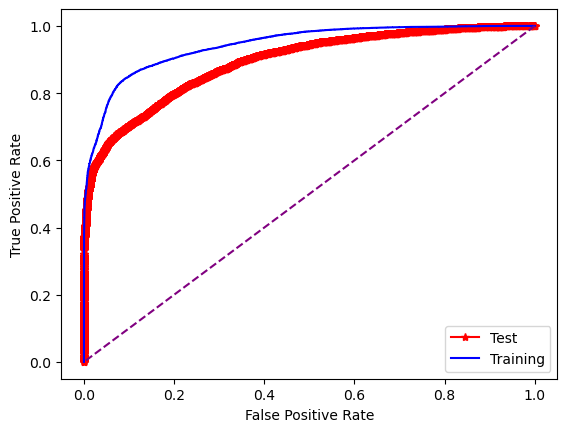

In [239]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=logistic_regression_model_2):
    return model.predict_proba(X)[:, 1]

def generate_roc_curve(y, probs):
    fpr, tpr, _ = roc_curve(y, probs, pos_label=True)
    return fpr, tpr

# Generate ROC curve for test data
fpr_test, tpr_test = generate_roc_curve(y_test, generate_probs(X_test))

# Generate ROC curve for train data
fpr_train, tpr_train = generate_roc_curve(y_train, generate_probs(X_train))

# Plot ROC curves
plt.plot(fpr_test, tpr_test, '-*r')
plt.plot(fpr_train, tpr_train, '-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test', 'Training'])
plt.plot([1, 0], [1, 0], color='purple', linestyle="--")
plt.show()


In [240]:
# Calculate and print ROC AUC score
roc_auc_score_lgr = roc_auc_score(y_test, generate_probs(X_test))
print(f'Roc_Accuracy_Score: {roc_auc_score_lgr:.2%}')

Roc_Accuracy_Score: 89.27%


In [241]:
# Define the decision tree pipeline
dt_pipeline_v2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])

# Define parameters for grid search
param_grid_v2 = [
    {'dt__max_depth': [1, 5, 10, 15],
     'dt__min_samples_split': [1, 3, 5],
     'dt__min_samples_leaf': [1, 2, 5]
    }
]

# Create GridSearchCV object
decision_tree_results_v2 = GridSearchCV(estimator=dt_pipeline_v2, 
                                        param_grid=param_grid_v2, 
                                        cv=20, 
                                        scoring='accuracy', 
                                        refit=True)

# Fit the model
decision_tree_results_v2.fit(X_train, y_train)

# Best estimator and best parameters
best_estimator_dt_v2 = decision_tree_results_v2.best_estimator_
best_params_dt_v2 = decision_tree_results_v2.best_params_

print("Best Estimator:", best_estimator_dt_v2)
print("Best Parameters:", best_params_dt_v2)

Best Estimator: Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=15, min_samples_split=3))])
Best Parameters: {'dt__max_depth': 15, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 3}


In [242]:
# Predicting on the test and train data using the best estimator from the decision tree results
predicted_y_test_dt = decision_tree_results_v2.best_estimator_.predict(X_test)
predicted_y_train_dt = decision_tree_results_v2.best_estimator_.predict(X_train)

# Printing the predictions
print(predicted_y_test_dt)
print(predicted_y_train_dt)

[False False False ... False False  True]
[ True False False ... False False False]


In [243]:
test_score_dt_v2 = decision_tree_results_v2.score(X_test, y_test)
print(f'Test Score: {test_score_dt_v2:.2%}')

Test Score: 88.54%


In [244]:
train_score_dt_v1 = decision_tree_results_v2.score(X_train, y_train)
print(f'Train Score: {train_score_dt_v1:.2%}')

Train Score: 88.77%


In [245]:
conf_matrix_dt_v1 = confusion_matrix(y_test, predicted_y_test_dt)
print(conf_matrix_dt_v1)

[[15152   415]
 [ 1877  2556]]


In [246]:
report_dt_v1 = classification_report(y_test, predicted_y_test_dt)
print(report_dt_v1)

              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15567
        True       0.86      0.58      0.69      4433

    accuracy                           0.89     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.88      0.89      0.88     20000



In [247]:
# Calculate and print accuracy score
accuracy_dt_v1 = accuracy_score(y_test, predicted_y_test_dt)
print(f'Accuracy Score: {accuracy_dt_v1:.2%}')

# Calculate and print precision score
precision_dt_v1 = precision_score(y_test, predicted_y_test_dt, average="macro")
print(f'Precision Score: {precision_dt_v1:.2%}')

# Calculate and print recall score
recall_dt_v1 = recall_score(y_test, predicted_y_test_dt, average="macro")
print(f'Recall Score: {recall_dt_v1:.2%}')

Accuracy Score: 88.54%
Precision Score: 87.50%
Recall Score: 77.50%


In [248]:
f1_score_dt_v1 = f1_score(y_test, predicted_y_test_dt)
print(f'F1 Score: {f1_score_dt_v1:.2%}')

F1 Score: 69.04%


In [249]:
# Define the decision tree pipeline for the second iteration
dtr_pipeline_v2 = Pipeline([
    ('processing_pipeline', processing_pipeline),
    ('dt', DecisionTreeClassifier())
])

# Define parameters for grid search for the second iteration
param_grid_v2 = [
    {'dt__max_depth': [14, 15, 16],
     'dt__min_samples_split': [4, 5, 6],
     'dt__min_samples_leaf': [1, 2, 3]
    }
]

# Create GridSearchCV object for the second iteration
decision_tree_results_v2 = GridSearchCV(estimator=dtr_pipeline_v2, 
                                        param_grid=param_grid_v2, 
                                        scoring='accuracy', 
                                        refit=True)

# Fit the model for the second iteration
decision_tree_results_v2.fit(X_train, y_train)

# Best estimator and best parameters for the second iteration
best_estimator_dt_v2 = decision_tree_results_v2.best_estimator_
best_params_dt_v2 = decision_tree_results_v2.best_params_

print("Best Estimator:", best_estimator_dt_v2)
print("Best Parameters:", best_params_dt_v2)

Best Estimator: Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('dt',
                 DecisionTreeClassifier(max_depth=16, min_samples_split=6))])
Best Parameters: {'dt__max_depth': 16, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 6}


In [252]:
Predict_y_test_dtr = decision_tree_results_v2.best_estimator_.predict(X_test)
Predict_y_train_dtr = decision_tree_results_v2.best_estimator_.predict(X_train)
print(Predict_y_test_dtr)
print(Predict_y_train_dtr)

[False False False ... False False  True]
[ True False False ... False False False]


In [254]:
print(f'Test Score: {decision_tree_results_v2.score(X_test, y_test): .2%}')


Test Score:  88.56%


In [255]:
print(f'Train Score: {decision_tree_results_v2.score(X_train, y_train): .2%}')


Train Score:  88.89%


In [256]:
confusion_matrix(y_test,Predict_y_test_dtr)


array([[15108,   459],
       [ 1829,  2604]], dtype=int64)

In [257]:
print(classification_report(y_test, decision_tree_results_v2.best_estimator_.predict(X_test)))


              precision    recall  f1-score   support

       False       0.89      0.97      0.93     15567
        True       0.85      0.59      0.69      4433

    accuracy                           0.89     20000
   macro avg       0.87      0.78      0.81     20000
weighted avg       0.88      0.89      0.88     20000



In [258]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_dtr):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_dtr,average="macro"):.2%}')

Accuracy Score:88.56%
Precision Score:87.11%
Recall Score:77.90%


In [259]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_dtr):.2%}')


F1 Score:69.48%


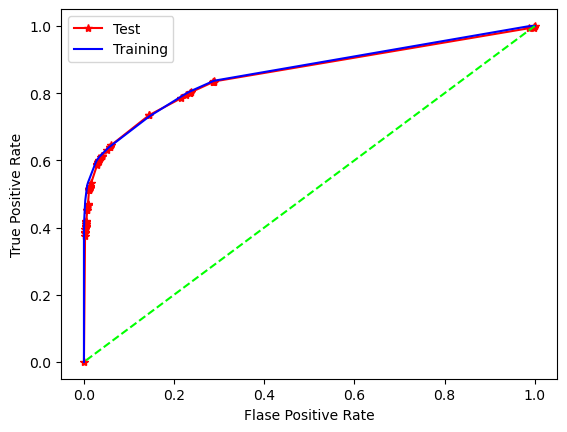

In [260]:
# ROC curve
def generate_probs(X, model=decision_tree_results_v2.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='lime', linestyle="--")
plt.show()

In [261]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')


Roc_Accuracy_Score:85.60%


In [263]:
## KNN- Model
knn_pipeline = Pipeline([('processing_pipeline',processing_pipeline),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [1, 4, 8, 10, 15], 'model__weights': ['uniform','distance']}
 ]

knn_results = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)
knn_results.best_estimator_

Pipeline(steps=[('processing_pipeline',
                 Pipeline(steps=[('create_dummies',
                                  Pipeline(steps=[('impute_missing',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('create_dummies',
                                                   OneHotEncoder(handle_unknown='ignore'))]))])),
                ('model',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

In [264]:
Predict_y_test_knn = knn_results.best_estimator_.predict(X_test)
Predict_y_train_knn = knn_results.best_estimator_.predict(X_train)
print(Predict_y_test_knn)
print(Predict_y_train_knn)

[False False False ... False False  True]
[ True False False ... False False False]


In [265]:
print(f'Test Score: {knn_results.score(X_test, y_test): .2%}')


Test Score:  86.56%


In [266]:
print(f'Train Score: {knn_results.score(X_train, y_train): .2%}')


Train Score:  100.00%


In [267]:
confusion_matrix(y_test,Predict_y_test_knn)


array([[15127,   440],
       [ 2247,  2186]], dtype=int64)

In [268]:
print(classification_report(y_test, knn_results.best_estimator_.predict(X_test)))


              precision    recall  f1-score   support

       False       0.87      0.97      0.92     15567
        True       0.83      0.49      0.62      4433

    accuracy                           0.87     20000
   macro avg       0.85      0.73      0.77     20000
weighted avg       0.86      0.87      0.85     20000



In [269]:
print(f'Accuracy Score:{accuracy_score(y_test,Predict_y_test_knn):.2%}')
print(f'Precision Score:{precision_score(y_test,Predict_y_test_knn,average="macro"):.2%}')
print(f'Recall Score:{recall_score(y_test,Predict_y_test_knn,average="macro"):.2%}')

Accuracy Score:86.56%
Precision Score:85.16%
Recall Score:73.24%


In [270]:
print(f'F1 Score:{f1_score(y_test,Predict_y_test_knn):.2%}')


F1 Score:61.94%


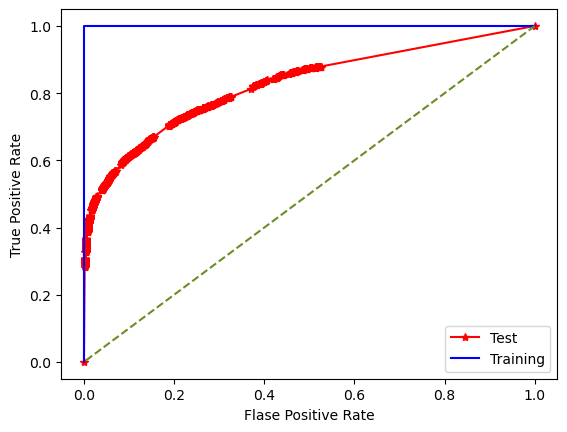

In [271]:
def generate_probs(X, model= knn_results.best_estimator_):
  return model.predict_proba(X)[:, 1]
def generate_roc(y,probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label=True)
    return fpr,tpr
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-*r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('Flase Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([1,0],[1,0], color='olivedrab', linestyle="--")
plt.show()

In [272]:
print(f'Roc_Accuracy_Score:{roc_auc_score(y_test, generate_probs(X_test)):.2%}')


Roc_Accuracy_Score:82.66%


### Conclusion


#### Based on our analysis, the logistic regression model emerges as the top performer among the decision tree and KNN models, boasting an impressive 89% accuracy. Delving deeper, logistic regression maintains a robust ROC accuracy score of 89.27% and a superior F1 score of 70.04%.Logistic regression edges ahead due to its consistency and higher ROC accuracy.

#### Our data highlights theft as the predominant crime type, with the 10th district bearing the brunt of criminal activity, particularly in October.

### Future Work

#### To enhance model performance, expanding our dataset beyond the current 100,000 records could yield significant improvements, capturing nuances like seasonal variations and long-term trends. While employing complex neural networks remains an option, it might introduce unnecessary complexity. Alternatively, exploring ensemble methods presents a promising avenue for boosting model efficacy and refining predictions.